In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import BasicAer
from qiskit.ml.datasets import ad_hoc_data, breast_cancer
from qiskit.aqua import aqua_globals, QuantumInstance
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua.algorithms import SklearnSVM, QSVM
from qiskit.circuit.library import ZZFeatureMap

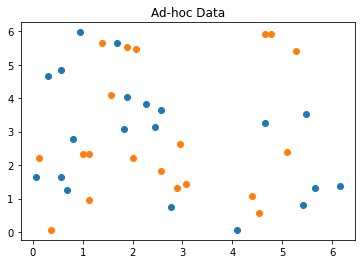

{'A': 0, 'B': 1} {0: 'A', 1: 'B'}


In [2]:
feature_dim = 2 # dimension of each data point
training_dataset_size = 20
testing_dataset_size = 10

sample_Total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=training_dataset_size, 
    test_size=testing_dataset_size, 
    n=feature_dim, gap=0.3, plot_data=True
)
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
label_to_class = {label:class_name for class_name, label in class_to_label.items()}
print(class_to_label, label_to_class)

kernel matrix during the training:


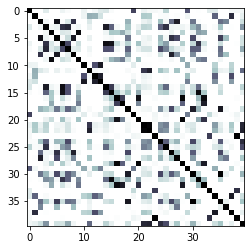

testing success ratio:  0.6
prediction of datapoints:
ground truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
predicted classes: ['B', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'A', 'A', 'B']
detail tentang Training dataset:  {'A': array([[4.64955713, 3.26725636],
       [4.08407045, 0.06283185],
       [0.69115038, 1.25663706],
       [2.45044227, 3.14159265],
       [0.31415927, 4.64955713],
       [0.56548668, 1.63362818],
       [2.26194671, 3.83274304],
       [1.82212374, 3.0787608 ],
       [0.06283185, 1.63362818],
       [0.56548668, 4.83805269],
       [6.1575216 , 1.38230077],
       [2.76460154, 0.75398224],
       [5.40353936, 0.81681409],
       [5.65486678, 1.31946891],
       [2.57610598, 3.64424748],
       [1.88495559, 4.0212386 ],
       [1.69646003, 5.65486678],
       [0.9424778 , 5.96902604],
       [0.81681409, 2.76460154],
       [5.46637122, 3.51858377]]), 'B': arra

In [3]:
aqua_globals.seed = 30
result = SklearnSVM(training_input, test_input, datapoints[0]).run()

print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix), interpolation='nearest', origin='upper', cmap='bone_r')
plt.show()

print("testing success ratio: ", result['testing_accuracy'])

print("prediction of datapoints:")
print("ground truth: {}".format(map_label_to_class_name(datapoints[1], label_to_class)))
print("predicted classes:", result['predicted_classes'])

print("detail tentang Training dataset: ", training_input)
print("detail tentang Testing dataset: ", test_input)
print("detail result: ", result)

# The breast cancer dataset

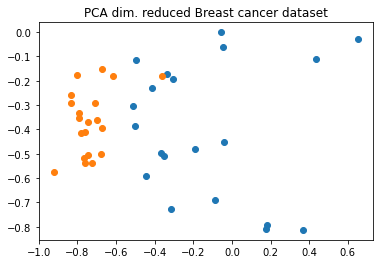

{'A': 0, 'B': 1} {0: 'A', 1: 'B'}


In [4]:
import time
start_time = time.time()

sample_Total, training_input, test_input, class_labels = breast_cancer(
    training_size=20, test_size=10, n=2, plot_data=True
)
# n =2 is the dimension of each data point

datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
label_to_class = {label:class_name for class_name, label in class_to_label.items()}
print(class_to_label, label_to_class)

kernel matrix during the training:


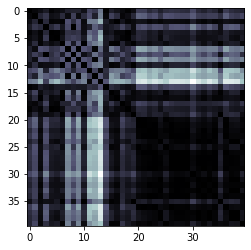

testing success ratio:  0.85
--- 0.27548813819885254 seconds ---
preduction of datapoints:
ground truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
predicted:    ['B', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
detail tentang Training dataset:  {'A': array([[-0.19172231, -0.48047638],
       [-0.08931675, -0.69047276],
       [-0.50124222, -0.38404633],
       [-0.04524656, -0.06299861],
       [-0.36503477, -0.4966686 ],
       [-0.44318575, -0.59164354],
       [-0.4146524 , -0.22790637],
       [ 0.18070867, -0.79119457],
       [-0.05916688, -0.00087508],
       [ 0.17702071, -0.80782303],
       [-0.33656083, -0.17191985],
       [ 0.43561957, -0.10878753],
       [ 0.3697556 , -0.81262249],
       [ 0.65356721, -0.03027689],
       [-0.04118997, -0.45214114],
       [-0.49742204, -0.11441314],
       [-0.51335869, -0.30515363],
       [-0.31666169, -0.72652614],
       [-

In [5]:
result = SklearnSVM(training_input, test_input, datapoints[0]).run()
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()

print("testing success ratio: ", result['testing_accuracy'])
print("--- %s seconds ---" % (time.time() - start_time))

print("preduction of datapoints:")
print("ground truth: {}".format(map_label_to_class_name(datapoints[1], label_to_class)))
print("predicted:    {}".format(result['predicted_classes']))

print("detail tentang Training dataset: ", training_input)
print("detail tentang Testing dataset: ", test_input)
print("detail result: ", result)